# Medical Health Insurance Cost Analysis and Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.describe(include=['object'])

,sex,smoker,region
count,2772,2772,2772
unique,2,2,4
top,male,no,southeast
freq,1406,2208,766


## Visualizing The Data

<Axes: xlabel='smoker', ylabel='charges'>

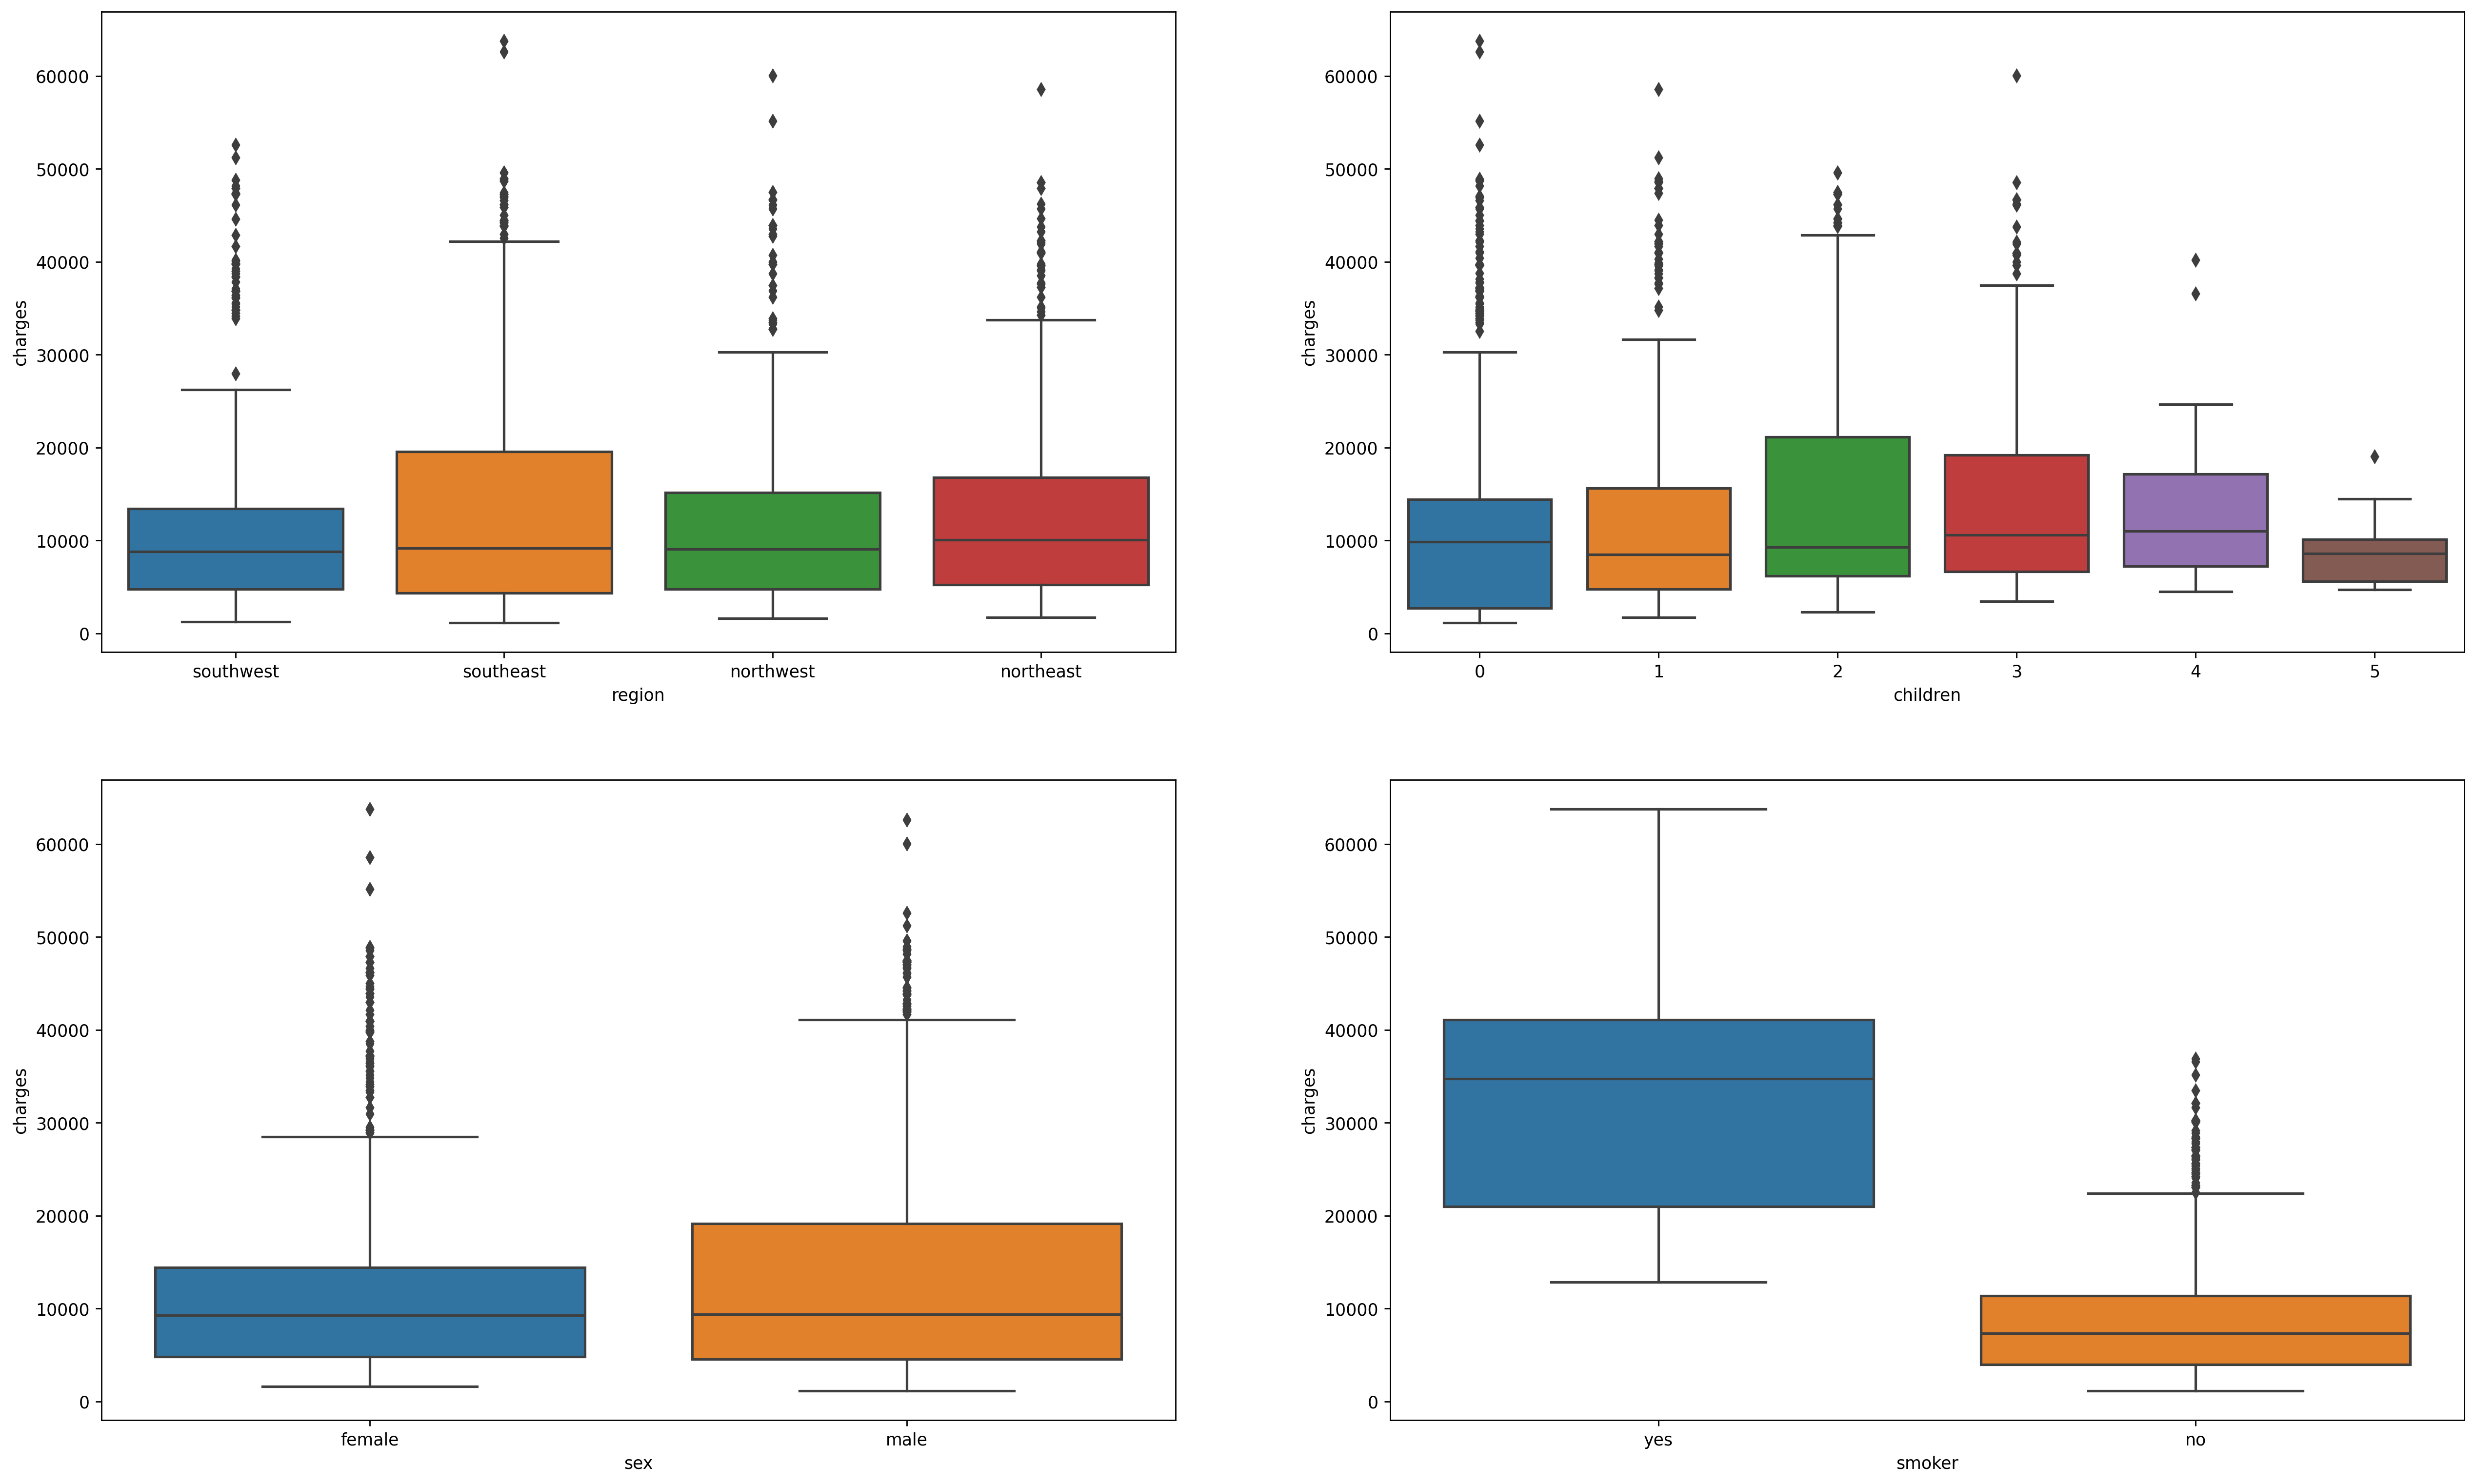

In [29]:
plt.figure (figsize = (25,15), dpi = 250)
plt.subplot(2,2,1)
sns.boxplot(x = 'region', y = 'charges', data = df)

plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df)

plt.subplot(2,2,3)
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.subplot(2,2,4)
sns.boxplot(x = 'smoker', y = 'charges', data = df)

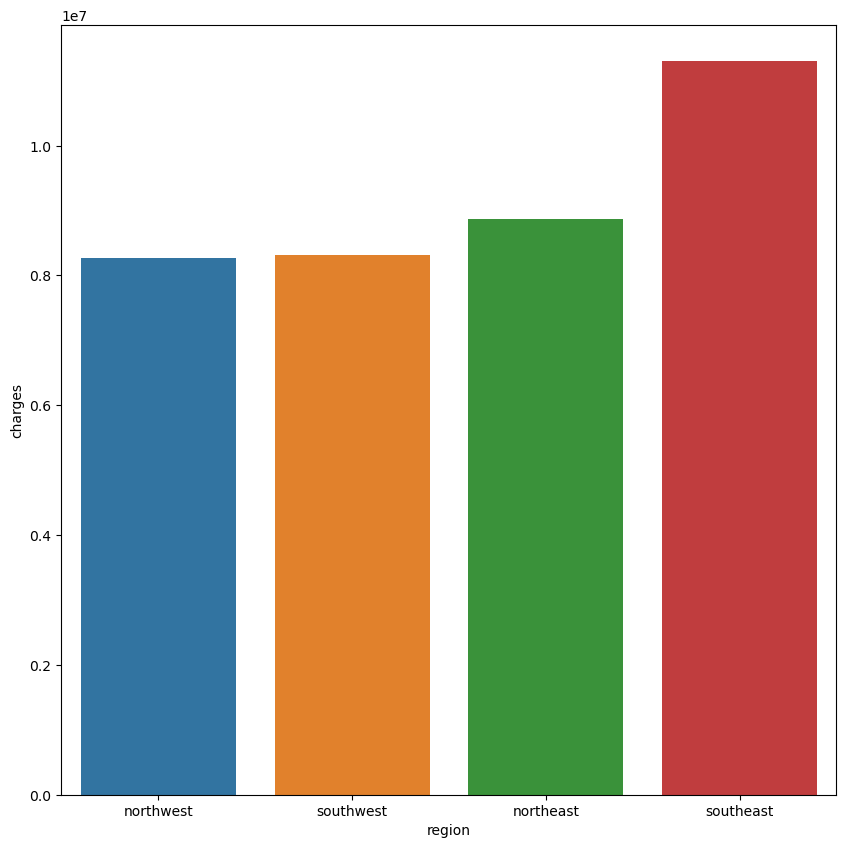

In [31]:
# Charges by region
charges = df['charges'].groupby(df.region).sum().sort_values(ascending= True)
plt.figure(figsize =(10,10))
ax = sns.barplot(x = charges.index, y = charges)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

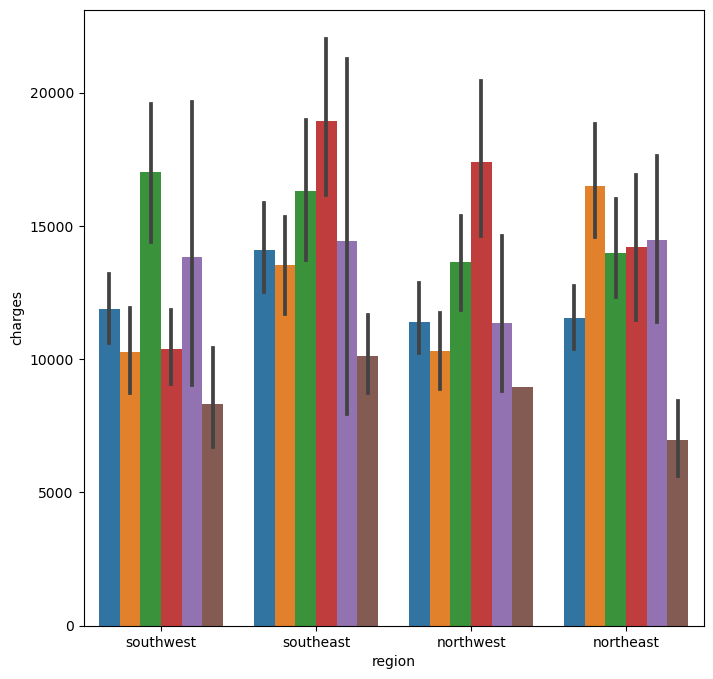

In [39]:
# charges by region and number of children
plt.figure(figsize=(8,8))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data = df)

<Axes: xlabel='region', ylabel='charges'>

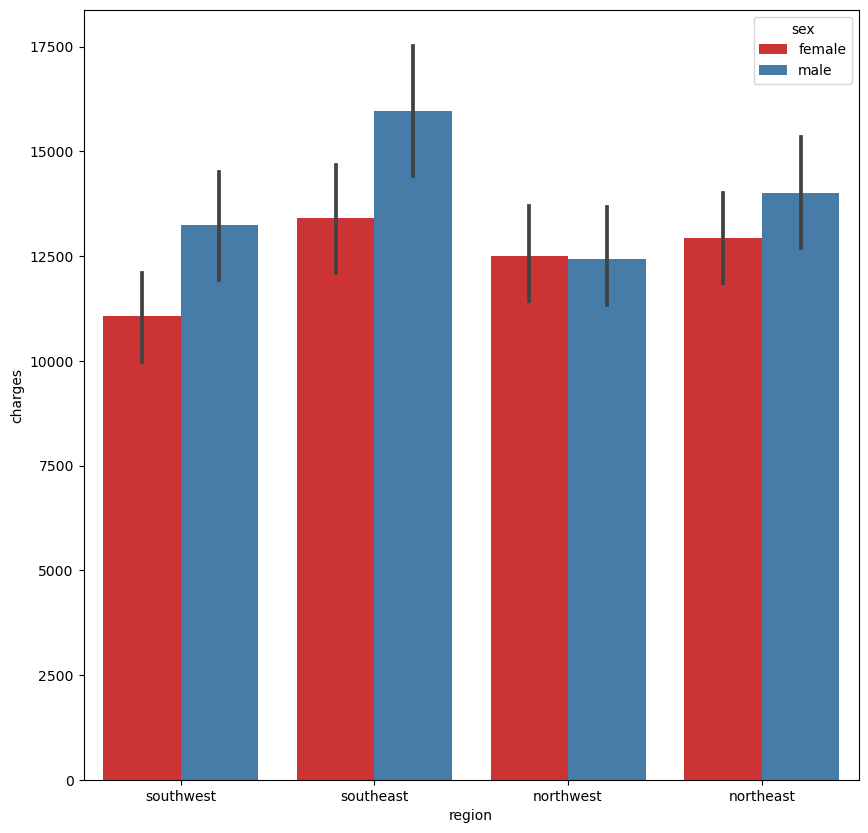

In [57]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'region', y = 'charges', hue = 'sex', data=df, palette='Set1')

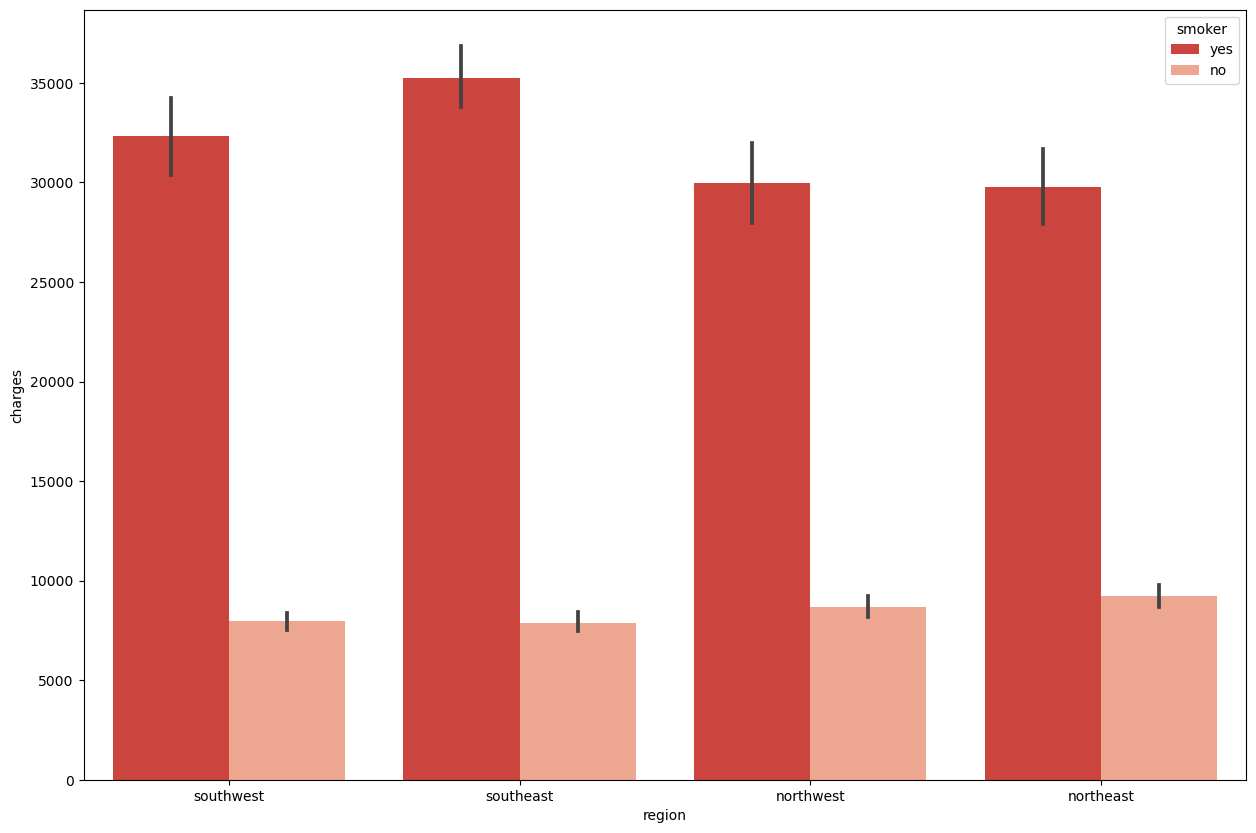

In [67]:
f, ax = plt.subplots(1, 1, figsize = (15,10))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'smoker', data = df, palette = 'Reds_r')


Text(0.5, 1.0, 'Number of children vs Medical Charges')

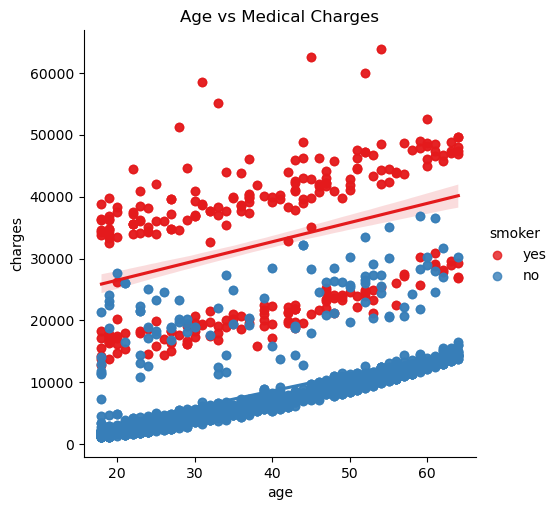

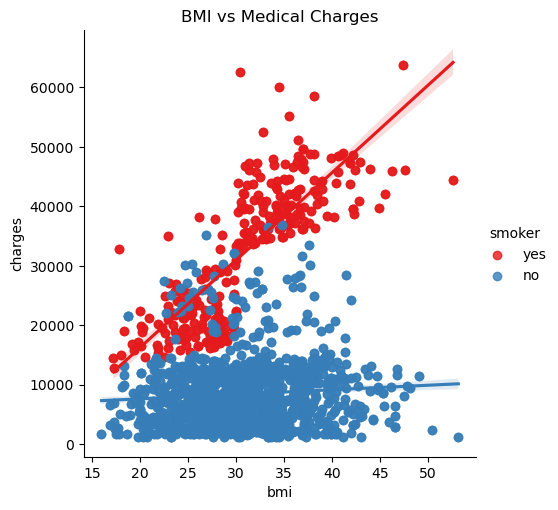

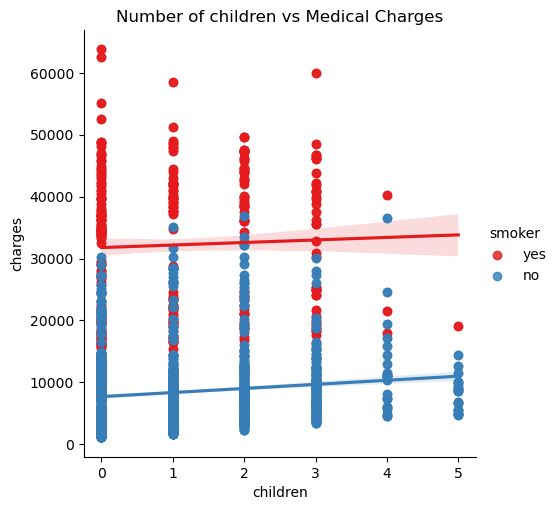

In [69]:
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Age vs Medical Charges')

ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('BMI vs Medical Charges')

ax = sns.lmplot(x = 'children', y = 'charges', data = df, hue = 'smoker', palette = 'Set1')
plt.title('Number of children vs Medical Charges')

In [71]:
# Converting data to categorical type data
df[['region','sex','smoker']] = df[['region','sex','smoker']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [73]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)

label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)

df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na opti

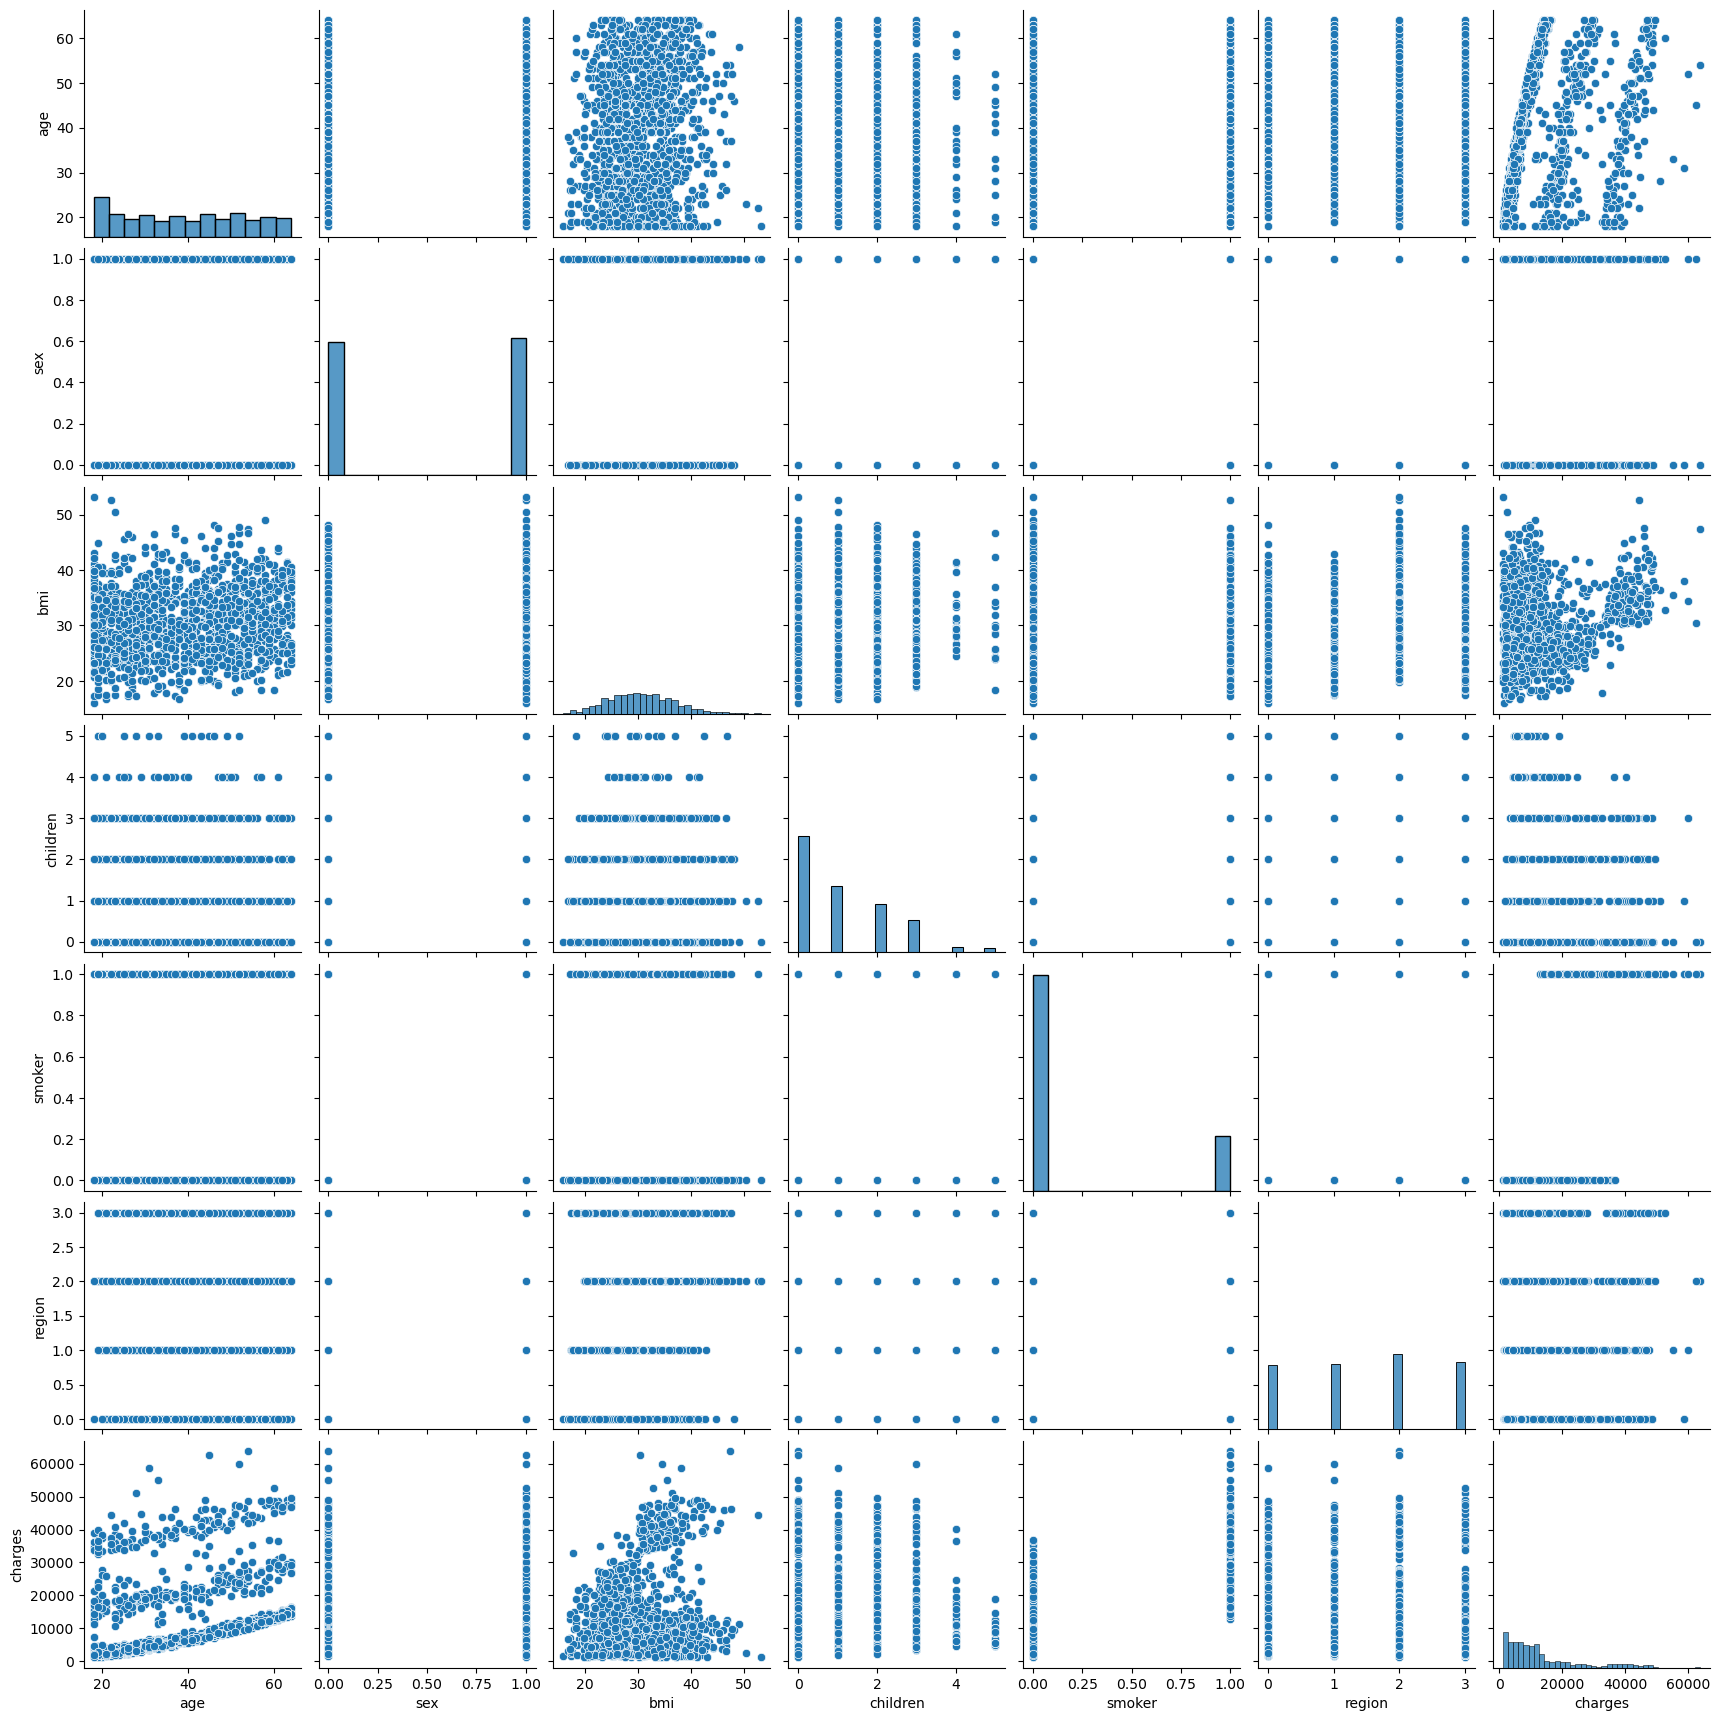

In [75]:
sns.pairplot(df)

<Axes: >

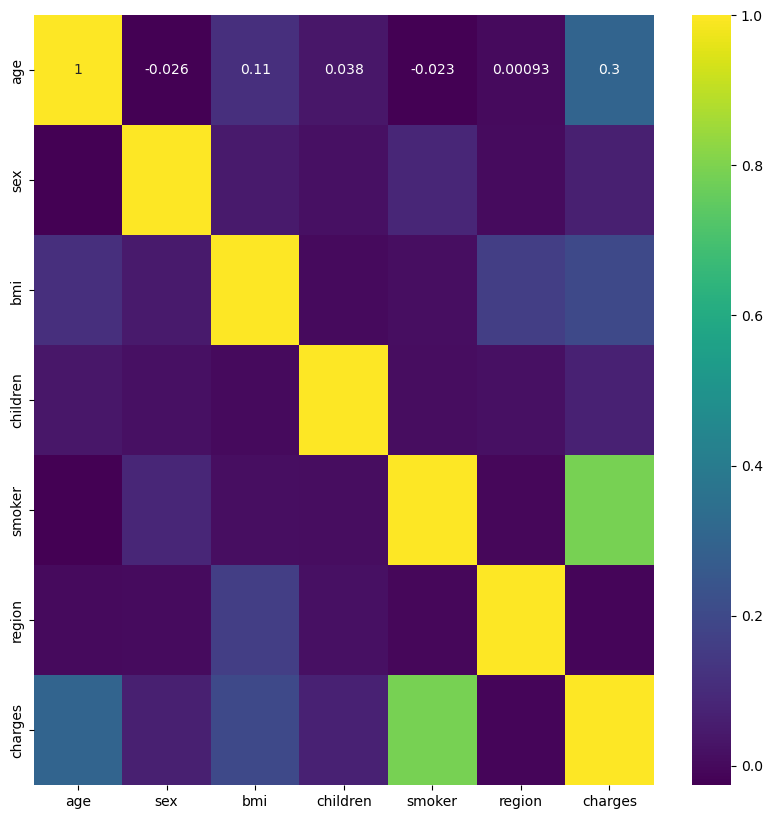

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

## Preparing Data for ML

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [90]:
features = df.drop(['charges'], axis=1)
target = df['charges']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)


The goal is to determine the insurance cost for an individual based on several factors. Therefore, this is a regression case. Regression models a target prediction value based on independent variables. We will use the following algorithms -

- Linear Regression
- Random Forest Regressor
- Gradient BoostingRegression

In [100]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [110]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures

In [148]:
Lin_reg_model = LinearRegression()
Lin_reg_model.fit(x_train, y_train)

print('Intercept:', Lin_reg_model.intercept_)
print('Coefficients:', Lin_reg_model.coef_)

Intercept: -10934.811447511975
Coefficients: [  246.71415851   -75.05162605   316.05625454   589.47069033
 23735.15910253  -398.0075511 ]


In [152]:

from sklearn.metrics import r2_score, mean_squared_error

Lin_reg_model_train_pred = Lin_reg_model.predict(x_train)
Lin_reg_model_test_pred = Lin_reg_model.predict(x_test)

# Mean squared error
Lin_reg_model_train_mse = mean_squared_error(y_train, Lin_reg_model_train_pred)
Lin_reg_model_test_mse = mean_squared_error(y_test, Lin_reg_model_test_pred)
print('MSE train data: {:.3}, \nMSE test data: {:.3}\n'.format(Lin_reg_model_train_mse, Lin_reg_model_test_mse))

# Root Mean Squared error
print('RMSE train data: {:.3}, \nRMSE test data: {:.3}\n'.format(
    np.sqrt(np.absolute(Lin_reg_model_train_mse)), 
    np.sqrt(np.absolute(Lin_reg_model_train_mse))))

# R^2 - coefficient of determination
print('R2 train data: {:.3}, \nR2 test data: {:.3}\n'.format(
    r2_score(y_train,Lin_reg_model_train_pred),
    r2_score(y_test,Lin_reg_model_test_pred)))

# Model Score
print('Linear Regression Model Score:', Lin_reg_model.score(x_test, y_test))

MSE train data: 3.74e+07, 
MSE test data: 3.56e+07

RMSE train data: 6.11e+03, 
RMSE test data: 6.11e+03

R2 train data: 0.741, 
R2 test data: 0.771

Linear Regression Model Score: 0.7708046355119609


In [116]:
# Define the model pipelines
pipeline_rf = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', RandomForestRegressor(random_state=42))
])

pipeline_gb = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', GradientBoostingRegressor(random_state=42))
])


# Define parameter grids for both models
param_grid_rf = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}


In [118]:
from sklearn.model_selection import GridSearchCV

In [122]:
# Perform GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(x_train, y_train)

# Perform GridSearchCV for Gradient Boosting
grid_search_gb = GridSearchCV(pipeline_gb, param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bgrid_search_gb.fit(x_train, y_train)

# Get the best models and their parameters
best_rf = grid_search_rf.best_estimator_
best_gb = grid_search_gb.best_estimator_

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)

Best Random Forest Parameters: {'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best Gradient Boosting Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 5, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}


In [128]:
from sklearn.metrics import mean_squared_error, r2_score

In [136]:
# Evaluate Gradient Boosting
y_pred_gb = best_gb.predict(x_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb).round(3)
print(f'Gradient Boosting - Mean Squared Error: {mse_gb}')
print(f'Gradient Boosting - R^2 Score: {r2_gb}')

Gradient Boosting - Mean Squared Error: 6793536.42756176
Gradient Boosting - R^2 Score: 0.956


In [134]:
# Evaluate Random Forest
y_pred_rf = best_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf).round(3)
print(f'Random Forest - Mean Squared Error: {mse_rf}')
print(f'Random Forest - R^2 Score: {r2_rf}')

Random Forest - Mean Squared Error: 7608390.244586112
Random Forest - R^2 Score: 0.951


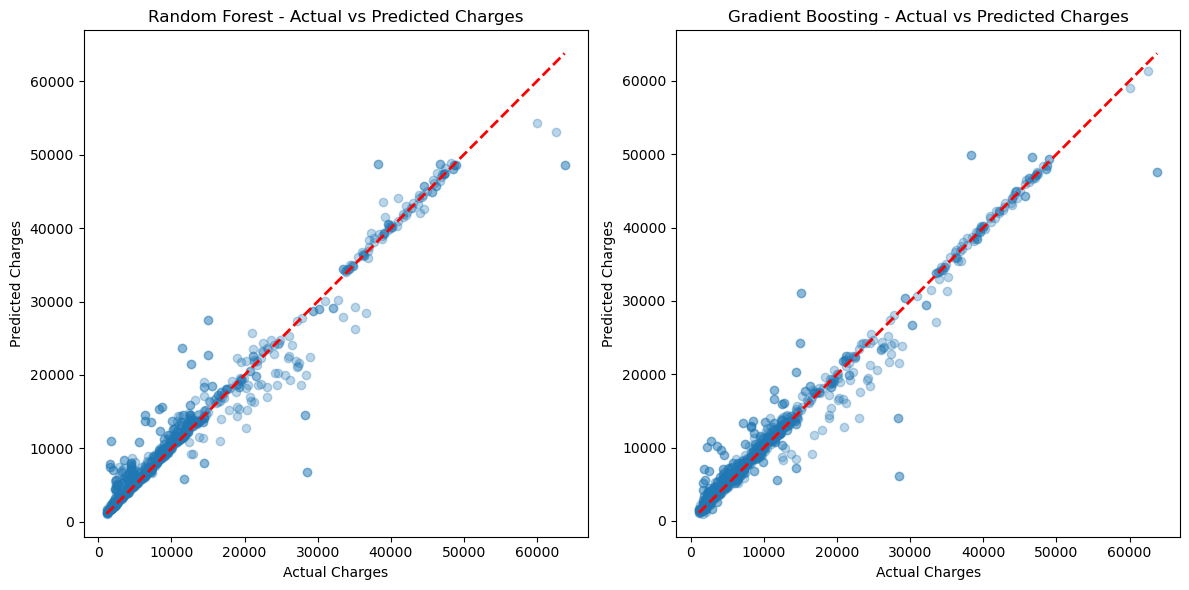

In [138]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest - Actual vs Predicted Charges')

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Gradient Boosting - Actual vs Predicted Charges')

plt.tight_layout()
plt.show()

In [158]:
 ## Save the predictions to a new file
# First, make predictions on the entire dataset
y_pred_rf_all = best_rf.predict(features)
y_pred_gb_all = best_gb.predict(features)

# Add predictions to the original dataframe
df['predicted_charges_rf'] = y_pred_rf_all
df['predicted_charges_gb'] = y_pred_gb_all

# Save the dataframe with predictions to a new CSV file
df.to_csv('insurance_with_predictions.csv', index=False)
print("Predictions saved to 'insurance_with_predictions.csv'")

Predictions saved to 'insurance_with_predictions.csv'


In [160]:
df1 = pd.read_csv('insurance_with_predictions.csv')
df1

,age,sex,bmi,children,smoker,region,charges,predicted_charges_rf,predicted_charges_gb
0,19,0,27.900,0,1,3,16884.92400,16966.864604,17630.849463
1,18,1,33.770,1,0,2,1725.55230,2321.074361,2811.550102
2,28,1,33.000,3,0,2,4449.46200,4831.386822,4753.687638
3,33,1,22.705,0,0,1,21984.47061,19883.380428,18888.276657
4,32,1,28.880,0,0,1,3866.85520,5885.538928,3608.176923
...,...,...,...,...,...,...,...,...,...
2767,47,0,45.320,1,0,2,8569.86180,8563.111788,8225.264702
2768,21,0,34.600,0,0,3,2020.17700,2019.649496,1710.677116
2769,19,1,26.030,1,1,1,16450.89470,16457.705503,16438.360509
2770,23,1,18.715,0,0,1,21595.38229,19881.977660,19920.834215
